<a href="https://colab.research.google.com/github/pandupuncak/Notebooks/blob/main/18219047_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

a.Download dataset Hepatitis C pada link berikut https://archive.ics.uci.edu/ml/datasets/HCV+data

b.Membagi dataset menjadi 3 bagian yaitu data train, data validasi, dan data uji

c.Merancang dan membangun model ANN

d.Lakukan tuning parameter agar menghasilkan model yang terbaik

e.Menampilkan grafik loss train dan validasi dari hasil pembangunan model

f.Menampilkan hasil confusion matrix dan akurasi dari data uji

# Initializing Notebook

In [284]:
import io

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib as plt
print('matplotlib: {}'.format(plt.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import seaborn as sns

Python: 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.21.5
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hcvdat0.csv to hcvdat0 (1).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['hcvdat0.csv']))

In [ ]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
ds = df.isin([np.inf, -np.inf])
print(ds)

     Unnamed: 0  Category    Age    Sex    ALB    ALP    ALT    AST    BIL  \
0         False     False  False  False  False  False  False  False  False   
1         False     False  False  False  False  False  False  False  False   
2         False     False  False  False  False  False  False  False  False   
3         False     False  False  False  False  False  False  False  False   
4         False     False  False  False  False  False  False  False  False   
..          ...       ...    ...    ...    ...    ...    ...    ...    ...   
608       False     False  False  False  False  False  False  False  False   
609       False     False  False  False  False  False  False  False  False   
610       False     False  False  False  False  False  False  False  False   
611       False     False  False  False  False  False  False  False  False   
612       False     False  False  False  False  False  False  False  False   

       CHE   CHOL   CREA    GGT   PROT  
0    False  False  Fal

In [ ]:
#Melihat row apa saja yang memiliki nilai NaN
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

     Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST    BIL  \
121         122  0=Blood Donor   43   m  48.6   45.0   10.5   40.5    5.3   
319         320  0=Blood Donor   32   f  47.4   52.5   19.1   17.1    4.6   
329         330  0=Blood Donor   33   f  42.4  137.2   14.2   13.1    3.4   
413         414  0=Blood Donor   46   f  42.9   55.1   15.2   29.8    3.6   
424         425  0=Blood Donor   48   f  45.6  107.2   24.4   39.0   13.8   
433         434  0=Blood Donor   48   f  46.8   93.3   10.0   23.2    4.3   
498         499  0=Blood Donor   57   f  48.4   94.4    2.5   39.6    2.3   
540         541    1=Hepatitis   38   m  45.0   56.3    NaN   33.1    7.0   
541         542    1=Hepatitis   19   m  41.0    NaN   87.0   67.0   12.0   
545         546    1=Hepatitis   29   m  49.0    NaN   53.0   39.0   15.0   
546         547    1=Hepatitis   30   m  45.0    NaN   66.0   45.0   14.0   
568         569     2=Fibrosis   49   m  39.0    NaN  118.0   62.0   10.0   

Karena kurangnya pengetahuan akan hasil tes darah untuk Hepatitis dan bagaimana pemrosesan nilai NaN di domainnya, maka kita akan drop saja.

In [ ]:
df = df.dropna()

# Splitting Data

# MLP Classifier SKLearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Category']

y_unique_array = y.unique()
print(y_unique_array)

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [ ]:
print(y.shape)

(589,)


Setelah melihat gambar di atas, dapat dilihat bahwa y merupakan kolom/data yang bersifat kategorikal, dan bukan numerik. Maka dari itu, perlu diubah menjadi float agar y dapat diproses dalam model ANN, khususnya model MLP, karena model MLP hanya menerima tipe data float. Sementara itu, untuk tipe-tipe data yang direpresentasikan oleh kolom 'Category' akan diencode menggunakan One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(df[['Category']]).toarray())

data = df.join(encoder_df)
print(data)

     Unnamed: 0       Category  Age Sex   ALB    ALP   ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5   7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3  18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7  36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0  30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1  32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...   ...    ...   ...   
608         609    3=Cirrhosis   58   f  34.0   46.4  15.0  150.0   8.0   
609         610    3=Cirrhosis   59   f  39.0   51.3  19.6  285.8  40.0   
610         611    3=Cirrhosis   62   f  32.0  416.6   5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8   2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3   3.5   99.0  48.0   

       CHE  CHOL   CREA    GGT  PROT    0    1    2    3    4  
0     6.93  3.23  106.0   12.1  69.

Entah kenapa One Hot Encoder disini menghasilkan encoding yang tidak seharusnya. Ada sekitar 21 row yang tidak terkena encoding oleh One Hot Encoder disini.

In [ ]:
#Melihat row apa saja yang memiliki nilai NaN
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN['Category'].value_counts())

3=Cirrhosis    21
Name: Category, dtype: int64


In [ ]:
data['Category'].value_counts()

0=Blood Donor             526
3=Cirrhosis                24
1=Hepatitis                20
2=Fibrosis                 12
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [ ]:
data[4].value_counts()

0.0    554
1.0     14
Name: 4, dtype: int64

In [ ]:
data.loc[data[4]==1.0]

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,0,1,2,3,4
565,566,2=Fibrosis,40,m,39.0,43.1,23.8,114.7,11.0,9.64,4.20,70.9,127.3,81.3,0.0,0.0,0.0,0.0,1.0
566,567,2=Fibrosis,46,m,45.0,26.9,23.1,125.0,17.0,6.97,4.01,60.5,72.2,73.0,0.0,0.0,0.0,0.0,1.0
567,568,2=Fibrosis,48,m,49.0,45.2,19.3,69.1,30.0,7.76,4.22,76.7,28.4,72.3,0.0,0.0,0.0,0.0,1.0
572,573,2=Fibrosis,54,m,41.0,41.8,41.5,187.9,21.0,8.59,5.85,91.0,104.9,79.1,0.0,0.0,0.0,0.0,1.0
573,574,2=Fibrosis,57,m,47.0,29.7,10.2,55.9,12.0,6.60,4.64,70.9,69.6,80.9,0.0,0.0,0.0,0.0,1.0
574,575,2=Fibrosis,59,m,44.0,34.5,8.9,74.5,6.0,9.45,4.45,65.0,95.3,69.7,0.0,0.0,0.0,0.0,1.0
575,576,2=Fibrosis,64,m,38.0,35.7,7.1,41.3,13.0,7.10,4.52,70.0,53.0,66.8,0.0,0.0,0.0,0.0,1.0
577,578,2=Fibrosis,36,f,46.0,39.3,67.1,161.9,13.0,9.24,4.81,65.3,60.0,73.9,0.0,0.0,0.0,0.0,1.0
578,579,2=Fibrosis,38,f,40.0,39.8,14.9,68.9,11.0,8.55,4.31,60.5,40.1,76.5,0.0,0.0,0.0,0.0,1.0
579,580,2=Fibrosis,57,f,43.0,52.1,8.3,35.8,18.0,8.61,6.19,71.4,27.9,82.0,0.0,0.0,0.0,0.0,1.0


Maka dari itu, meskipun One Hot Encoder sebenarnya lebih pas, kita akan mencoba menggunakan Label Binarizer.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#Binary encode
lb = LabelBinarizer()
df_binary_encoded = lb.fit_transform(df['Category'])

In [ ]:
df1 = df.join(pd.DataFrame(df_binary_encoded, columns=lb.classes_,index=df.index))
df1

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,0,0,0,0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,0,0,0,0
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,0,0,0,0
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,0,0,0,0
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,0,0,0,0,1
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5,0,0,0,0,1
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,0,0,0,1
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,0,0,0,1


In [254]:
# Tidak dibutuhkan dengan label binarizer
# y_dict = {}

# i = 0
# for row in y_unique_array:
#   key = i
#   value = row.rpartition('=')[2]
#   i = i + 1
#   y_dict[key] = value

# print(y_dict)

Karena berdasarkan penjelasan informasi atribut dataset bahwa data laboratorium hanyalah mencakup atribut 5 sampai 14 (ALB sampai PROT), maka dari itu diasumsikan bahwa data yang akan berguna dalam kalkulasi model ANN hanyalah data-data ini. 

Untuk pembandingnya, maka dibuat juga algoritma yang akan memperhitungkan umur ke dalam penghitungan model.

In [255]:
# # Tanpa umur
# x = df1.iloc[:,4:14]

# Dengan umur
x = df1.iloc[:,2:14]
x = x.drop(['Sex'],axis=1)
x.head(1)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


In [256]:
y = df1.iloc[:,14:18]
y.head(1)

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis
0,1,0,0,0


In [257]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1)

In [258]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.2)

In [259]:
print("x_train", x_train.shape)
print("x_val", x_val.shape)
print("x_test", x_test.shape)

x_train (424, 11)
x_val (106, 11)
x_test (59, 11)


## Define and Compile Model

In [260]:
from sklearn.neural_network import MLPClassifier

In [261]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='logistic', max_iter = 800)

## Fit Model and Evaluation Model

In [262]:
from sklearn.metrics import accuracy_score

In [263]:
print(x_train)

     Age   ALB    ALP   ALT   AST   BIL    CHE  CHOL  CREA    GGT  PROT
553   41  42.0   39.6  26.5  77.6  42.0   9.67  9.67  57.7  143.4  75.8
381   43  41.2   38.2  18.6  20.5   9.3   6.15  5.44  64.0    9.7  70.9
50    36  42.6   65.3  35.8  27.1  15.7  10.66  4.38  96.0   34.7  71.0
335   34  37.3   36.3  19.9  28.7   3.8   3.90  4.94  86.0    4.9  70.7
267   59  45.7  115.4  16.4  23.8   3.7   8.20  4.46  70.0   14.3  78.5
..   ...   ...    ...   ...   ...   ...    ...   ...   ...    ...   ...
203   50  43.1   73.7  19.0  21.8   2.9   9.45  6.06  91.0   33.3  68.9
16    33  40.9   73.0  17.2  22.9  10.0   6.98  5.22  90.0   14.7  72.4
407   46  36.7   62.3  10.8  17.4   3.7   6.17  4.07  67.0   15.1  69.0
202   50  43.8   56.9  29.5  32.8   4.1   7.77  5.80  72.0   53.6  72.5
144   45  46.4   77.0  60.3  32.9   8.8   9.38  6.27  85.0   81.1  75.5

[424 rows x 11 columns]


In [264]:
print(y_train)

     0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis
553              0                       0            1           0
381              1                       0            0           0
50               1                       0            0           0
335              1                       0            0           0
267              1                       0            0           0
..             ...                     ...          ...         ...
203              1                       0            0           0
16               1                       0            0           0
407              1                       0            0           0
202              1                       0            0           0
144              1                       0            0           0

[424 rows x 4 columns]


In [265]:
y_train = y_train.dropna()
y_train

,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis
553,0,0,1,0
381,1,0,0,0
50,1,0,0,0
335,1,0,0,0
267,1,0,0,0
...,...,...,...,...
203,1,0,0,0
16,1,0,0,0
407,1,0,0,0
202,1,0,0,0


In [266]:
mlp.fit(x_train,y_train)

MLPClassifier(activation='logistic', max_iter=800)

In [267]:
prediksi_val = mlp.predict(x_val)
acc_val = accuracy_score(y_val,prediksi_val)
print("Akurasi Validasi Training ANN: ", acc_val)

Akurasi Validasi Training ANN:  0.9433962264150944


Akurasi model tanpa umur bernilai 92 %, sementara dengan menghitung umur maka akurasinya bernilai 94%. Maka dari itu model yang lebih baik adalah model yang melibatkan atribut umur tersebut. 

# Keras and Pytorch

In [288]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [410]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [411]:
model = keras.Sequential()

In [412]:
model.add(Flatten())

#Tuning by adding models to increase accuracy
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

#Tuning by adding models to increase accuracy
model.add(Dense(20, activation='relu'))

model.add(Dense(10, activation= 'softmax'))

#Output layer must be the same as the target
model.add(Dense(4, activation= 'softmax'))

In [413]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [414]:
# first = model.fit(x_train,y_train,epochs=10,batch_size=100,validation_data=(x_test,y_test))
first = model.fit(x_train,y_train,epochs=20,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/20
5/5 [==============================] - 1s 65ms/step - loss: 1.8025 - acc: 0.0165 - val_loss: 1.6650 - val_acc: 0.0508
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 1.6821 - acc: 0.0165 - val_loss: 1.6426 - val_acc: 0.0339
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 1.5197 - acc: 0.0165 - val_loss: 1.1741 - val_acc: 0.0508
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 1.1510 - acc: 0.0189 - val_loss: 1.1379 - val_acc: 0.0508
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 1.1250 - acc: 0.0189 - val_loss: 1.1375 - val_acc: 0.0508
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 1.1124 - acc: 0.0189 - val_loss: 1.1263 - val_acc: 0.0508
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 1.1001 - acc: 0.0189 - val_loss: 1.1152 - val_acc: 0.0508
Epoch 8/20
5/5 [==============================] - 0s 9ms/step - loss: 1.0878 - acc: 0.0189 - val_loss:

In [415]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 11)                0         
                                                                 
 dense_69 (Dense)            (None, 128)               1536      
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                                 
 dense_71 (Dense)            (None, 32)                2080      
                                                                 
 dense_72 (Dense)            (None, 20)                660       
                                                                 
 dense_73 (Dense)            (None, 10)                210       
                                                                 
 dense_74 (Dense)            (None, 4)               

In [416]:
loss, accuracy = model.evaluate(x_test,y_test)
print("Akurasi testing ANN: ", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.9392 - acc: 0.9153
Akurasi testing ANN:  0.9152542352676392


Dapat dilihat bahwa dengan model 32, 10, dan 4 saja bersama dengan model Flatten di awal untuk mengonversinya menjadi bentuk yang bisa dipakai oleh Dense, maka akurasi dari model adalah 88% . Saat ditambahkan model lain pula juga tidak terlalu mengubah hasil akurasi dari model, dengan nilai akurasi yang tetap sama di 88%. Penambahan jumlah Epoch juga tidak terlalu mengubah hasil.

Tetapi saat seluruhnya dikombinasikan dan ditambah, maka akurasinya naik pula hingga menjadi 91.5 %

# Grafik Loss Train

Error

In [422]:
model.save('my_model1.h5')

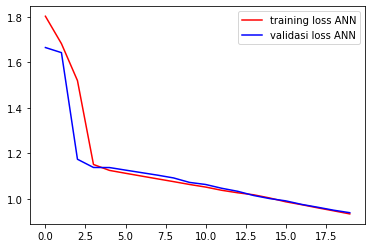

In [423]:
import matplotlib.pyplot as plt

epochs = range(20)
loss1 = first.history['loss']
val_loss1 = first.history['val_loss']
plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()


# Confusion Matrix

In [419]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [420]:
test_val = mlp.predict(x_test)
cf_matrix = confusion_matrix(y_test.values.argmax(axis=1),test_val.argmax(axis=1))

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

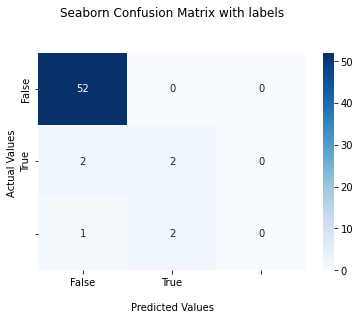

In [421]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()